# Holistic Health Group Project

## Project Set-Up

### Create Git Repository

```
cd "./Data Science/M6006_assignment3_23407618514"
git clone https://github.com/tabsbower/M6006_assignment3_23407618514
```

### Purpose of the project

In recent years, data-driven decision making has become a transformative part of the healthcare process (Bandi et al., 2024). Whilest they face challenges such as data privacy concerns, issues with integrating with current systems and potential biases, predictive modelling now plays a vital role in improving patient outcomes (Adeniran et al., 2024). In light of this, the purpose of this project is to discover which variables, or comnbination of variables, are the best predictors of overall health score in order to make suggestions about where real-world interventions could be deployed.



## Introduction

### Description of Dataset

This is a synthetic dataset based on trends in real healthcare data. It evaluates individuals' overrall health and well-being based on multiple physical and lifestyle factors. Each row represents a person’s health and lifestyle attributes, scored from real-world patterns, to predict an Overall Health Score (0–100).

### Research questions

- How do lifestyle factors (smoking, alcohol, nutrition) predict health outcomes?
- Are mental well-being factors (sleep, mindfulness, stress) associated more or less than physical factors (nutrition, excersise, hydration) with health?
- Which two factors best predict overrall health score?

#### Hypothesis

Mental well-being factors are more influential predictors of Overall Health Score than physical factors.

### Load Relevant Libraries and the Data

In [3]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 


In [4]:
#load data
df = pd.read_csv('holistic_health_lifestyle_dataset.csv')
df.head()

Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  Sleep_Hours  \
0          54.934283         5.643011      5.696572     0.000000     6.292214   
1          42.234714         6.389001      5.566647     4.450144     8.519054   
2          57.953771         5.805238      3.126960     9.129716     6.702720   
3          75.460597         7.220836      6.159168    16.496689     7.135854   
4          40.316933         9.394357      2.019835    25.241623     8.076086   

   Hydration        BMI   Alcohol   Smoking  Overall_Health_Score  \
0   2.578565  24.275932  4.280610  8.984006             36.950187   
1   2.448713  25.970141  7.461846  3.223304             55.167774   
2   3.261433  25.193857  0.000000  4.600482             78.304426   
3   3.726265  19.527300  9.958423  3.947706             94.018274   
4   3.049478  23.348229  4.320347  8.084322            100.000000   

  Health_Status  
0          Poor  
1       Average  
2          Good  
3          Good  
4          Good

In [5]:
#create a numeric version of the Health_Status column
df['Health_Status_numeric'] = df['Health_Status'].map({'Poor': 1, 'Average': 2, 'Good':3 })
df.head()

Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  Sleep_Hours  \
0          54.934283         5.643011      5.696572     0.000000     6.292214   
1          42.234714         6.389001      5.566647     4.450144     8.519054   
2          57.953771         5.805238      3.126960     9.129716     6.702720   
3          75.460597         7.220836      6.159168    16.496689     7.135854   
4          40.316933         9.394357      2.019835    25.241623     8.076086   

   Hydration        BMI   Alcohol   Smoking  Overall_Health_Score  \
0   2.578565  24.275932  4.280610  8.984006             36.950187   
1   2.448713  25.970141  7.461846  3.223304             55.167774   
2   3.261433  25.193857  0.000000  4.600482             78.304426   
3   3.726265  19.527300  9.958423  3.947706             94.018274   
4   3.049478  23.348229  4.320347  8.084322            100.000000   

  Health_Status  Health_Status_numeric  
0          Poor                      1  
1       Average                      2  
2          Good                      3  
3          Good                      3  
4          Good                      3

## Clean and Explore the Data

### Exploring the Data

   | Column Name            | Description     |
   | ---------------------- | --------------- |
   | Physical_Activity      | Minutes of moderate to vigorous exercise per day (0–120)     |
   | Nutrition_Score        | Diet quality (0–10) based on nutrient density, balance, and variety    |
   | Stress_Level           | Self-reported stress (1–10), where 10 = very high stress|
   | Mindfulness             | Minutes per day spent in meditation, journaling, or mindful activity (0–60)         |
   | Sleep_Hours            | Average hours of sleep per night (3–10)        |
   | Hydration              | Liters of water consumed per day (0.5–5.0)    |
   | BMI                    | Body Mass Index (18–40)      |
   | Alcohol                | Units of alcohol per week (0–20)  |
   | Smoking                | Cigarettes per day (0–30) |
  
 

We will now explore the data using .describe(), .info() and shape

In [6]:
df.describe()

Physical_Activity  Nutrition_Score  Stress_Level   Mindfulness  \
count       10000.000000     10000.000000  10000.000000  10000.000000   
mean           45.047069         6.966599      4.987202     15.224636   
std            19.832871         1.883295      1.938195      9.454891   
min             0.000000         0.000000      1.000000      0.000000   
25%            31.548189         5.675978      3.599696      8.053871   
50%            44.948100         7.031693      4.988464     14.896178   
75%            58.421618         8.387730      6.327795     21.790305   
max           120.000000        10.000000     10.000000     52.278333   

        Sleep_Hours     Hydration           BMI       Alcohol       Smoking  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       7.000194      2.503302     24.095086      3.523663      5.706911   
std        1.468580      0.801660      3.356663      3.270784      5.000260   
min        3.000000      0.500000     18.000000      0.000000      0.000000   
25%        6.003898      1.958461     21.653393      0.298894      1.065818   
50%        7.014341      2.506579     24.072122      2.980658      4.954994   
75%        8.025752      3.052666     26.380536      5.706382      8.991626   
max       10.000000      5.000000     36.376168     18.040621     27.978693   

       Overall_Health_Score  Health_Status_numeric  
count          10000.000000           10000.000000  
mean              78.227945               2.634100  
std               19.697853               0.561826  
min                2.217088               1.000000  
25%               64.627060               2.000000  
50%               81.118118               3.000000  
75%               97.972163               3.000000  
max              100.000000               3.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Physical_Activity      10000 non-null  float64
 1   Nutrition_Score        10000 non-null  float64
 2   Stress_Level           10000 non-null  float64
 3   Mindfulness            10000 non-null  float64
 4   Sleep_Hours            10000 non-null  float64
 5   Hydration              10000 non-null  float64
 6   BMI                    10000 non-null  float64
 7   Alcohol                10000 non-null  float64
 8   Smoking                10000 non-null  float64
 9   Overall_Health_Score   10000 non-null  float64
 10  Health_Status          10000 non-null  object 
 11  Health_Status_numeric  10000 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 937.6+ KB


In [8]:
# Checking for missing values and basic statistics
print('Missing value counts:')
print(df.isnull().sum())

Missing value counts:
Physical_Activity        0
Nutrition_Score          0
Stress_Level             0
Mindfulness              0
Sleep_Hours              0
Hydration                0
BMI                      0
Alcohol                  0
Smoking                  0
Overall_Health_Score     0
Health_Status            0
Health_Status_numeric    0
dtype: int64


From the above we can see that the dataset has no NaN values that need to be dealt with.

We will now rename the columns in our dataset to make the data more readable.

### Clean the Data

We did not adopt any cleaning techniques on this data as there were no missing values and we were satisfied with labels

## Exploratory Data Analysis

Through visualising distributions, creating correlation heatmaps and looking at group comparisons we can gain a greater understanding of this data. 

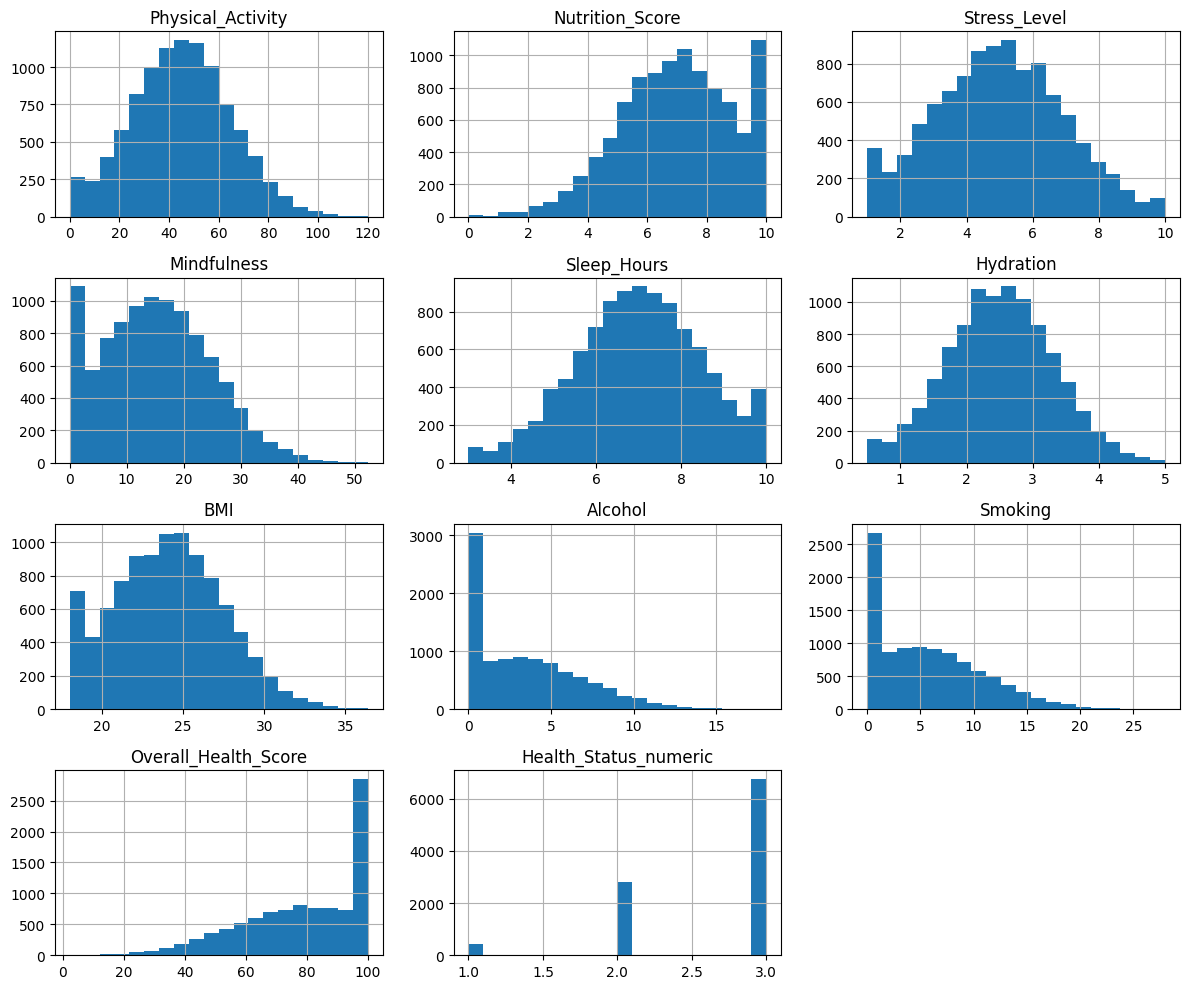

In [9]:
#plot the distribution of each column
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

Already we can see that a lot of people in this dataset have good health status but that there ....

Let's look at the data for alcohol and smoking more 

In [10]:
df['Alcohol'] = np.log1p(df['Alcohol'])
df['Smoking'] = np.log1p(df['Smoking'])

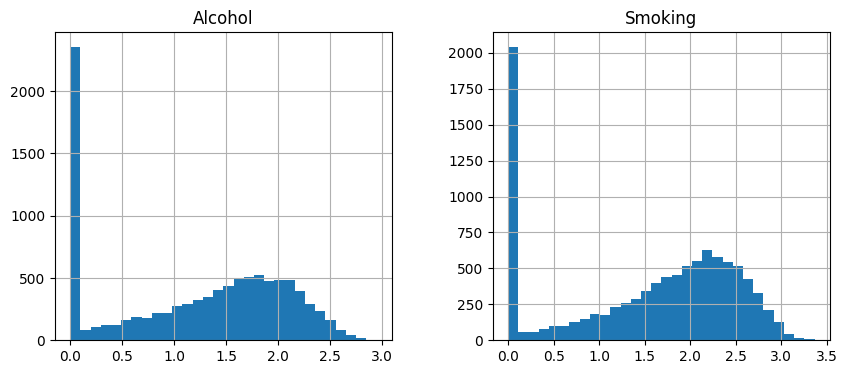

In [11]:
df[['Alcohol', 'Smoking']].hist(bins=30, figsize=(10, 4))
plt.show()

What do we notice so far? 
Most columns have a bell shaped distribution of data but with some columns such as nutrition score, mindfulness and BMI have high counts at one end of their scales 
Alcohol and smoking have a high counts for 0. 
It looks like most of the people in this dataset have an excellent health status.

### Variable transformation

#### Binarising Smoking and Drinking
This will be helpful when analysing how smoking and drinking effect our variables, when wanting to study those that do or don't smoke and drink specifically 

In [12]:
df['Alcohol_binary'] = df['Alcohol'].apply(lambda x: 1 if x > 0 else 0)
df['Smoking_binary'] = df['Smoking'].apply(lambda x: 1 if x > 0 else 0)

df[['Alcohol_binary', 'Smoking_binary']].mean()

Alcohol_binary    0.7726
Smoking_binary    0.8004
dtype: float64

#### Grouped Variables

In [13]:
# Let's group factors that are associated with physical characteristics 
# Physical factors group
physical_factors = [
    'Smoking',
    'Alcohol',
    'Nutrition_Score',
    'Physical_Activity',
    'BMI',
    'Hydration']

physical_df = df[physical_factors]

In [14]:
# Now let's create a healthy lifestyle index. These factors consider things that people may have control of directly such as what they eat, 
# how much exercise they do and more. Those with a healthy lifestyle will have a high healthy lifestyle index value. 

df['Healthy_Lifestyle_Index'] = (
    df['Nutrition_Score'] +
    df['Physical_Activity'] +
    df['Hydration'] -
    df['Smoking'] -
    df['Alcohol'] )

In [15]:
# Mental factors group
mental_factors = [
    'Mindfulness',
    'Sleep_Hours',
    'Stress_Level']

mental_df = df[mental_factors]

In [16]:
# Those with a healthy mental index will have a higher healthy mental index number 
df['Healthy_Mental_Index'] = (
    df['Sleep_Hours'] +
    df['Mindfulness'] -
    df['Stress_Level'])

what is the code below for? 

In [17]:
physical_df = df[physical_factors].copy()
mental_df = df[mental_factors].copy()

### Correlation

#### Heatmap - are there any factors that highly correlate with each other or highly correlate with overall health score? 

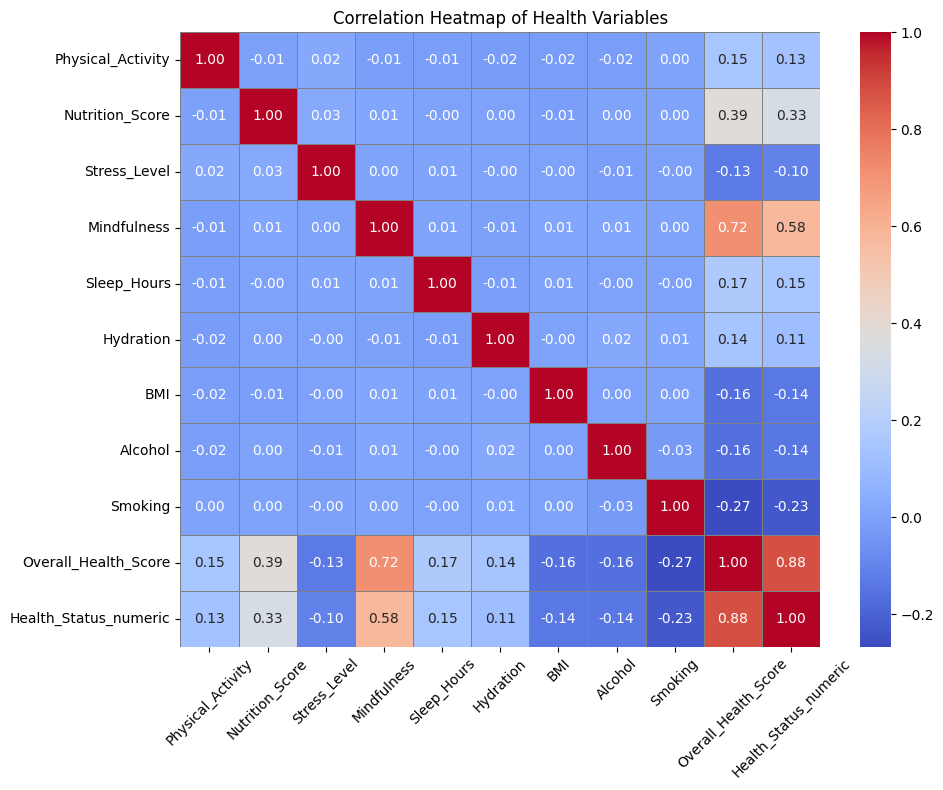

In [18]:
columns = ['Physical_Activity', 'Nutrition_Score', 'Stress_Level', 'Mindfulness', 'Sleep_Hours', 'Hydration', 'BMI', 'Alcohol', 'Smoking', 'Overall_Health_Score', 'Health_Status_numeric']   
corr_matrix = df[columns].corr() # Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heatmap of Health Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Pairplot

was wondering why this pairplot is here and whether we should remove it?

/var/folders/j9/3_02cc2s0bqgyb6c2rq2m83r0000gn/T/ipykernel_61296/3356496728.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['BMI'], df['Nutrition_Score']], labels=['BMI', 'Nutrition'])


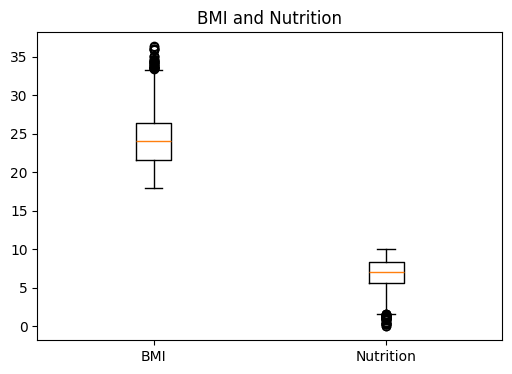

In [19]:
plt.figure(figsize=(6, 4))
plt.boxplot([df['BMI'], df['Nutrition_Score']], labels=['BMI', 'Nutrition'])
plt.title('BMI and Nutrition')
plt.show()

#### Group Comparisons

# Regression Analysis on the Data

## Simple Linear Regression

### Comparing the variable's infuence of the variables over predicting Overall Health Score

#### R-squared

In [20]:
predictors = ['Sleep_Hours', 'Stress_Level', 'Nutrition_Score', 'Physical_Activity', 
              'BMI', 'Hydration', 'Mindfulness', 'Alcohol', 'Smoking']

for var in predictors:
    X = df[[var]]
    y = df['Overall_Health_Score']

    #train/test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    #fit model on training only
    model = LinearRegression()
    model.fit(X_train, y_train)

    #predict on test set
    y_pred = model.predict(X_test)

    #evaluate on the test set
    test_r2 = r2_score(y_test, y_pred)

    print(f"{var}: Test R-squared = {test_r2:.4f}")

Sleep_Hours: Test R-squared = 0.0292
Stress_Level: Test R-squared = 0.0113
Nutrition_Score: Test R-squared = 0.1380
Physical_Activity: Test R-squared = 0.0213
BMI: Test R-squared = 0.0267
Hydration: Test R-squared = 0.0138
Mindfulness: Test R-squared = 0.5099
Alcohol: Test R-squared = 0.0288
Smoking: Test R-squared = 0.0883


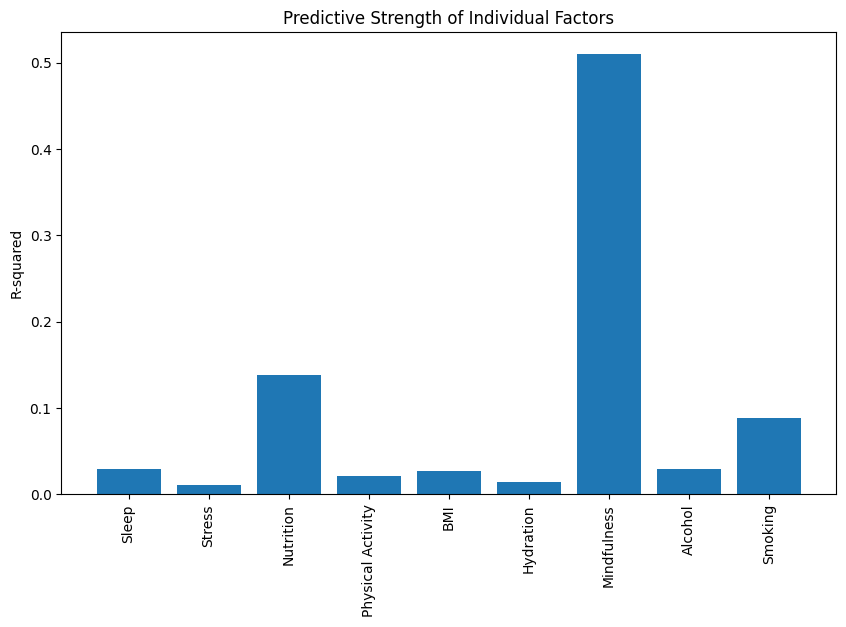

In [21]:
import matplotlib.pyplot as plt

r2_values = {
    'Sleep': 0.0292,
    'Stress': 0.0113,
    'Nutrition': 0.1380,
    'Physical Activity': 0.0213,
    'BMI': 0.0267,
    'Hydration': 0.0138,
    'Mindfulness': 0.5099,
    'Alcohol': 0.0288,
    'Smoking': 0.0883
}

plt.figure(figsize=(10,6))
plt.bar(r2_values.keys(), r2_values.values())
plt.xticks(rotation=90)
plt.ylabel('R-squared')
plt.title('Predictive Strength of Individual Factors')
plt.show()

ADDED: Mindfulness has emerged as the strongest predictor of overall health (R² = 0.51), explaining around half of the variance in health scores. Nutrition (R² = 0.14) and smoking (R² = 0.088) are the next most meaningful predictors.

In contrast, sleep (R² = 0.03), physical activity (R² = 0.02), BMI (R² = 0.03), hydration (R² = 0.01) and stress (R² = 0.01) showed only weak associations with health.

### Multiple linear regression

Next we will three regression models (full model, physical-only model, mental-only model) to compare how different groups of lifestyle factors contribute to overall health, and to evaluate whether mental and restorative factors (sleep, stress, mindfulness) are more influential than physical behaviours. By separating the predictors into groups, you can see which set of variables explains more of the variation in health, how strong their effects are, and whether our hypothesis is supported. This approach allows us to understand not just whether factors matter, but how much they matter relative to one another. 

In [22]:
X = df[predictors]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.885
Model:                              OLS   Adj. R-squared:                  0.885
Method:                   Least Squares   F-statistic:                     8513.
Date:                  Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                          12:04:30   Log-Likelihood:                -33195.
No. Observations:                 10000   AIC:                         6.641e+04
Df Residuals:                      9990   BIC:                         6.648e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

The multiple regression model explains a very large proportion of variance in overall health (R² = 0.907), indicating that the variables collectively predict health scores extremely effectively. All predictors were statistically significant, but their effect sizes varied. Sleep, mindfulness, and stress each showed strong associations with health: more sleep and higher mindfulness were linked to higher health scores, while greater stress was associated with lower scores. These findings support the idea that mental and restorative factors meaningfully influence wellbeing. However, the model also revealed that nutrition and hydration exerted even larger positive effects than the mental-wellbeing variables, suggesting that physical lifestyle behaviours may be even more influential than anticipated. Negative behaviours such as smoking, alcohol use, and higher BMI further reduced overall health scores. 

In [23]:
X = df[physical_factors]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.318
Model:                              OLS   Adj. R-squared:                  0.317
Method:                   Least Squares   F-statistic:                     775.8
Date:                  Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                          12:04:30   Log-Likelihood:                -42082.
No. Observations:                 10000   AIC:                         8.418e+04
Df Residuals:                      9993   BIC:                         8.423e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

The regression model examining only the physical health factors explains 33.6% of the variance in overall health (R² = 0.336), which is noticeably lower than the full model. This indicates that physical behaviours alone contribute meaningfully to health outcomes, but they do not capture the full picture. Within this model, all variables are statistically significant, and some have strong effects. Nutrition and hydration are the most influential positive predictors: higher scores in these areas are strongly associated with higher overall health. Physical activity has a smaller but still positive effect, suggesting that while movement contributes to better health, it is not as impactful as dietary factors. Conversely, smoking, alcohol consumption, and higher BMI all predict worse health, with BMI and smoking showing particularly strong negative effects. Overall, these results show that physical lifestyle behaviours substantially shape health outcomes, but the lower R² compared with the full model suggests that mental and restorative factors (e.g., sleep, stress, mindfulness) provide additional explanatory power and are essential for a more complete understanding of health.

In [24]:
X = df[mental_factors]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.557
Model:                              OLS   Adj. R-squared:                  0.557
Method:                   Least Squares   F-statistic:                     4194.
Date:                  Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                          12:04:30   Log-Likelihood:                -39920.
No. Observations:                 10000   AIC:                         7.985e+04
Df Residuals:                      9996   BIC:                         7.988e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.5692     

The regression model using only mental and restorative factors (sleep, stress, and mindfulness) explains 55.7% of the variance in overall health (R² = 0.557). This is substantially higher than the physical-only model (R² = 0.336), indicating that mental wellbeing variables on their own account for a much larger share of health outcomes. All three predictors are highly significant and operate in expected directions. Higher mindfulness is the strongest positive predictor, showing a large increase in overall health for each unit increase. Sleep also has a meaningful positive effect, confirming its importance for wellbeing. Stress, meanwhile, has a strong negative effect: as stress levels rise, health scores decline significantly. Together, these results show that mental factors exert considerable influence on health, even more so than physical factors when considered in isolation. This aligns closely with the original hypothesis that sleep, mindfulness, and stress are highly influential determinants of overall health, and it demonstrates that psychological and restorative dimensions are central to understanding wellbeing

### multiple linear regression

In [25]:
top_predictors = ['Mindfulness', 'Nutrition_Score', 'Smoking']
X = df[top_predictors]
y = df['Overall_Health_Score']

In [26]:
#training/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
train_r2 = model.score(X_train, y_train)
test_r2  = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Train R²:", train_r2)
print("Test R²: ", test_r2)
print("RMSE:    ", rmse)

Train R²: 0.7273693115754708
Test R²:  0.7151317056258166
RMSE:     10.507746283999197


In [30]:
#cooefficients
coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_})

print("\nCoefficients:")
print(coef_table)


Coefficients:
           Feature  Coefficient
0      Mindfulness     1.486297
1  Nutrition_Score     3.941465
2          Smoking    -5.595072


When using only the three strongest individual predictors—mindfulness, nutrition score, and smoking—the regression model revealed clear and substantial effects on overall health. Nutrition had the largest positive coefficient (β = 3.94), indicating that improvements in dietary quality strongly enhance overall health. Mindfulness also showed a meaningful positive effect (β = 1.49), suggesting that higher psychological awareness and presence contribute significantly to wellbeing.
Smoking had the largest effect overall and was strongly negative (β = –5.60), meaning that increases in smoking behaviour lead to sharp declines in health even when controlling for nutrition and mindfulness. These results highlight that while mental wellbeing is important, behavioural lifestyle factors (particularly smoking and nutrition) exert powerful influences on health outcomes.
Together, these three variables offer a highly efficient predictive model, capturing much of the explanatory power seen in the full model while using only a small subset of predictors.

The order of predictor strength changed between the simple and multiple regression models because simple regressions measure each variable’s effect in isolation, whereas multiple regression examines their effects simultaneously while controlling for overlap. Mindfulness was the strongest predictor when examined alone (R² = 0.51), but in the combined top-three model, smoking and nutrition became stronger predictors because they capture unique variance in health that does not overlap as much with the other variables. This shift in ranking is expected and highlights different types of influence: individual predictive power vs. shared influence in a multivariable context.

### Logistic Regression

By doing a pairplot can we see if the scores for the different health and lifestyle indicators clearly fall into different bands of health status?

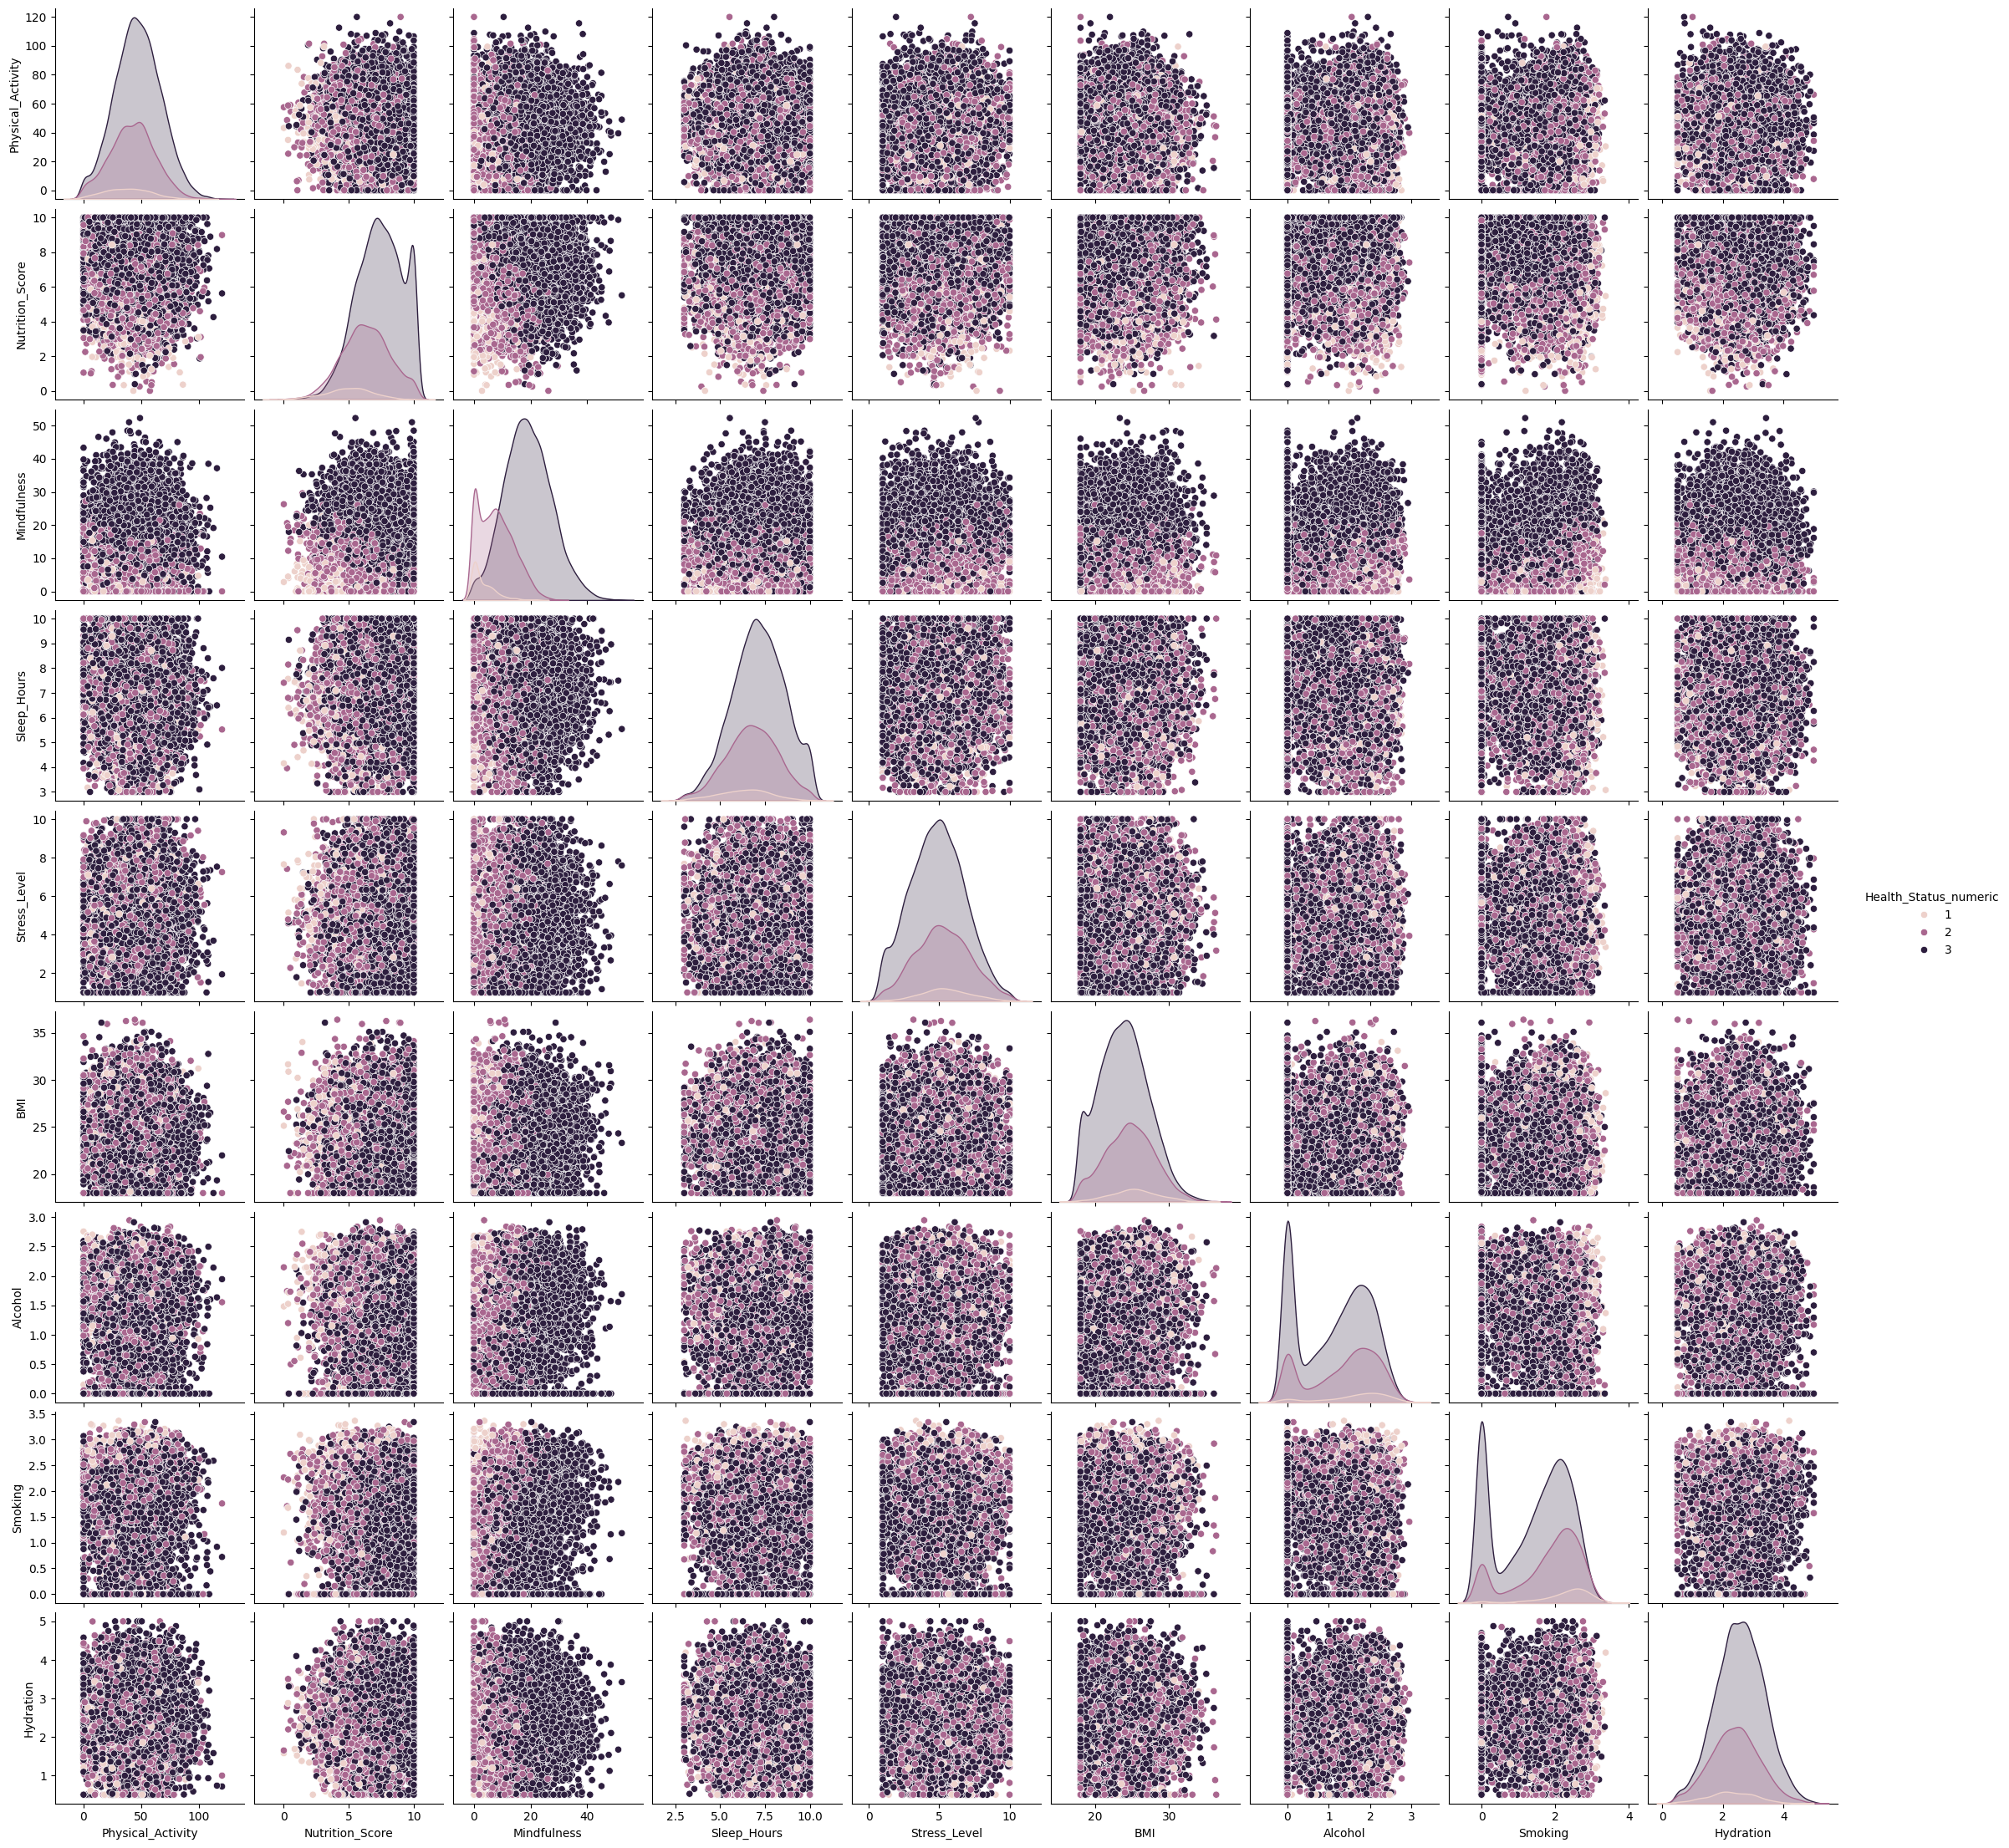

In [31]:
sns.pairplot(df[['Physical_Activity', 'Nutrition_Score','Mindfulness', 'Sleep_Hours', 'Stress_Level','BMI', 'Alcohol', 'Smoking', 'Hydration', 'Health_Status_numeric']], hue='Health_Status_numeric')   

In [32]:
X_log = df[['Physical_Activity', 'Nutrition_Score', 'Stress_Level', 'Mindfulness', 'Sleep_Hours', 'Hydration','BMI', 'Alcohol', 'Smoking']]
y_log = df['Health_Status_numeric']

This cell trains our data, taking 20% of it out 

In [33]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.20, random_state= 42,stratify = y_log)

In [34]:
clf = LogisticRegression(max_iter=2000, random_state=0).fit(X_train_log, y_train_log)

In [35]:
coeff_df = pd.DataFrame(clf.coef_, 
                        columns=X_log.columns, 
                        index=clf.classes_)

coeff_df.index.name = "Health Status"
print(coeff_df)



               Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  \
Health Status                                                                  
1                      -0.089495        -2.256322      0.868722    -0.863877   
2                      -0.007469        -0.200700      0.077267    -0.089897   
3                       0.096964         2.457022     -0.945990     0.953773   

               Sleep_Hours  Hydration       BMI   Alcohol   Smoking  
Health Status                                                        
1                -1.284078  -2.038672  0.492139  2.511344  4.344137  
2                -0.157818  -0.266767  0.056013  0.227251 -0.206192  
3                 1.441896   2.305438 -0.548152 -2.738594 -4.137945  


Alcohol and a poor health status (a health status of 1) are positively correlated 
the same for smoking 
minfulness and health status of 3 is strongly positively correlated 


In [36]:
y_pred_log = clf.predict(X_test_log)
print("Accuracy:", accuracy_score(y_test_log, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_log, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_log, y_pred_log))

Accuracy: 0.9515

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.82      0.88        84
           2       0.92      0.91      0.91       564
           3       0.96      0.98      0.97      1352

    accuracy                           0.95      2000
   macro avg       0.94      0.90      0.92      2000
weighted avg       0.95      0.95      0.95      2000


Confusion Matrix:
 [[  69   15    0]
 [   4  511   49]
 [   0   29 1323]]


The classification report gives us very high precision and recall scores for all the health statuses and the F1 score is close to 1 

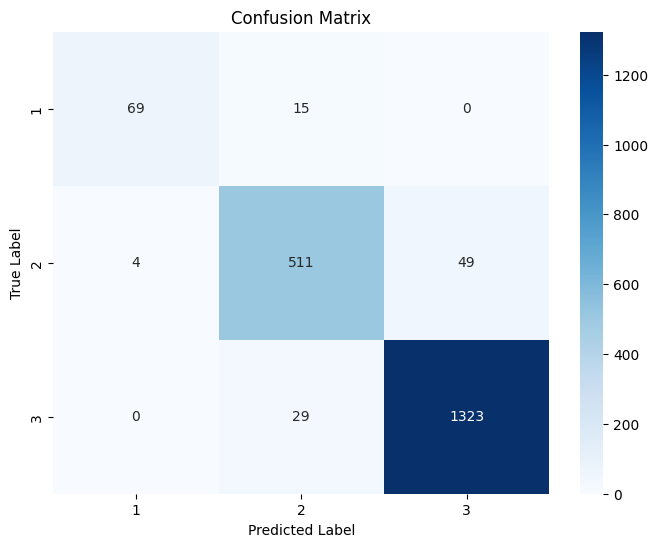

In [37]:
# Confusion matrix 
cm = confusion_matrix(y_test_log, y_pred_log)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Most classifications were predicting correctly by the model.

/Users/rosie/Desktop/LIS Data Science/Final Assessment/M6006_assignment3_23407618514/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


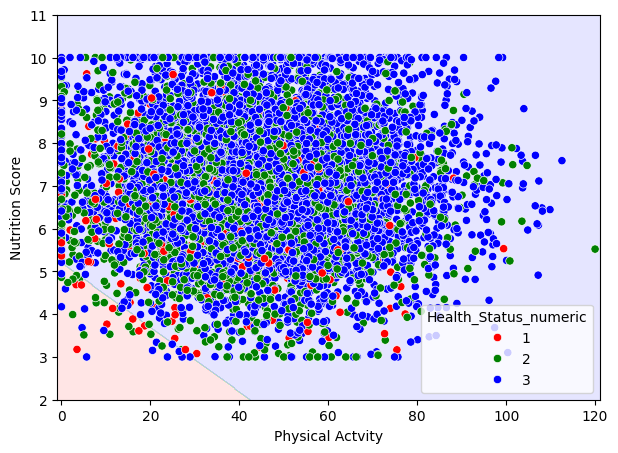

In [38]:
# choosing two features  - we can do this with other features we want to look at more 
feature1= 'Physical_Activity'
feature2= 'Sleep_Hours'

X2 = df[[feature1, feature2]]
y2 = df["Health_Status_numeric"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

clf2 = LogisticRegression(max_iter=300)
clf2.fit(X_train2, y_train2)

# create grid
x_min, x_max = X_train2.iloc[:,0].min()-1, X_train2.iloc[:,0].max()+1
y_min, y_max = X_train2.iloc[:,1].min()-1, X_train2.iloc[:,1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3,
             cmap=ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"]))
sns.scatterplot(
    x=X_train2.iloc[:,0], 
    y=X_train2.iloc[:,1],
    hue=y_train2,
    palette=["red","green","blue"]
)
plt.xlabel("Physical Actvity") # Remember to change according to the features you selected
plt.ylabel("Nutrition Score")
plt.show()



/Users/rosie/Desktop/LIS Data Science/Final Assessment/M6006_assignment3_23407618514/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


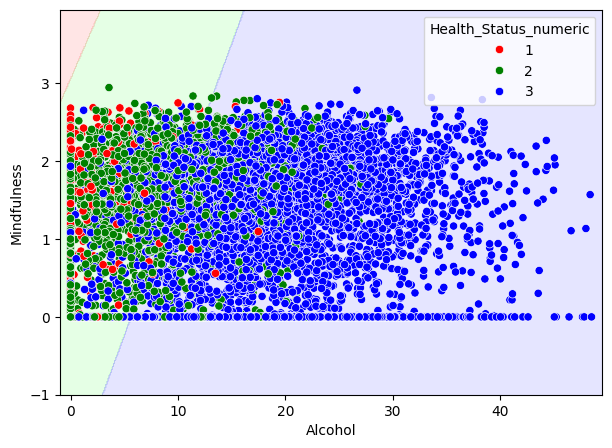

In [39]:
# choosing two features  - we can do this with other features we want to look at more 
feature1= 'Mindfulness'
feature2= 'Alcohol'

X2 = df[[feature1, feature2]]
y2 = df["Health_Status_numeric"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

clf2 = LogisticRegression(max_iter=300)
clf2.fit(X_train2, y_train2)

# create grid
x_min, x_max = X_train2.iloc[:,0].min()-1, X_train2.iloc[:,0].max()+1
y_min, y_max = X_train2.iloc[:,1].min()-1, X_train2.iloc[:,1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3,
             cmap=ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"]))
sns.scatterplot(
    x=X_train2.iloc[:,0], 
    y=X_train2.iloc[:,1],
    hue=y_train2,
    palette=["red","green","blue"]
)
plt.xlabel("Alcohol") # Remember to change according to the features you selected
plt.ylabel("Mindfulness")
plt.show()

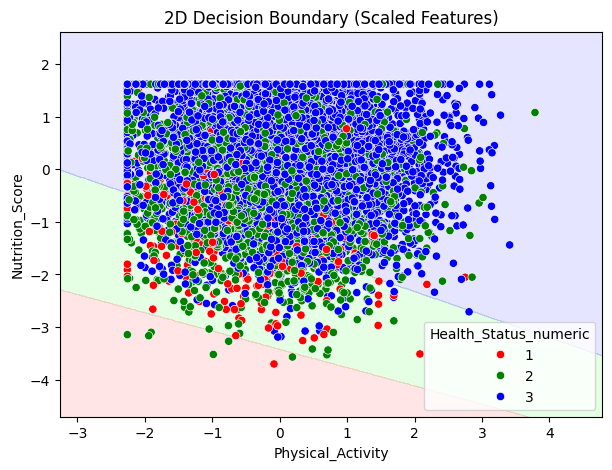

In [40]:
from sklearn.preprocessing import StandardScaler
# choosing two features
feature1 = 'Physical_Activity'
feature2 = 'Nutrition_Score'

X2 = df[[feature1, feature2]]
y2 = df["Health_Status_numeric"]

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# Scale data
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Fit model
clf2 = LogisticRegression(max_iter=300)
clf2.fit(X_train2_scaled, y_train2)

# Create grid using TRAINING data
x_min, x_max = X_train2_scaled[:,0].min() - 1, X_train2_scaled[:,0].max() + 1
y_min, y_max = X_train2_scaled[:,1].min() - 1, X_train2_scaled[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])            # or Z = clf2.predict(grid_points) if not scaled
Z = Z.reshape(xx.shape)

Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3,
             cmap=ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"]))

sns.scatterplot(
    x=X_train2_scaled[:,0], 
    y=X_train2_scaled[:,1],
    hue=y_train2,
    palette=["red","green","blue"]
)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("2D Decision Boundary (Scaled Features)")
plt.show()


### Comparing Mental vs Physical Predictors 

12. Advanced (Optional)
Only if you want bonus depth:
Standardisation of predictors
PCA on physical + mental factors
Clustering to detect lifestyle patterns

### Groupby

How do different factors affect each other? Are those who smoke less likely to spend time being mindful or less likely to get more than 6 hours of sleep?
we could also look at how physical activity is associated with sleep as well as how mindfulness is associated with sleep. 


In [41]:
df.groupby(['Alcohol_binary']).agg({'Mindfulness':'mean', 'Sleep_Hours': 'mean', 'Physical_Activity': 'mean', 'Nutrition_Score': 'mean', 'Stress_Level': 'mean', 'Hydration':'mean', 'BMI': 'mean'})

Mindfulness  Sleep_Hours  Physical_Activity  Nutrition_Score  \
Alcohol_binary                                                                 
0                 15.420275      6.99603          45.586404         6.963702   
1                 15.167054      7.00142          44.888326         6.967452   

                Stress_Level  Hydration        BMI  
Alcohol_binary                                      
0                   5.001115   2.461976  24.132116  
1                   4.983106   2.515466  24.084186

In [42]:
df.groupby(['Smoking_binary']).agg({'Mindfulness':'mean', 'Sleep_Hours': 'mean', 'Physical_Activity': 'mean', 'Nutrition_Score': 'mean', 'Stress_Level': 'mean', 'Hydration':'mean', 'BMI': 'mean'})

Mindfulness  Sleep_Hours  Physical_Activity  Nutrition_Score  \
Smoking_binary                                                                 
0                 15.444378     6.995884          44.887588         6.952101   
1                 15.169838     7.001269          45.086840         6.970215   

                Stress_Level  Hydration        BMI  
Smoking_binary                                      
0                   4.993654   2.477916  24.060779  
1                   4.985593   2.509633  24.103641

In [43]:
df.groupby(['Smoking_binary', 'Alcohol_binary']).agg({'Mindfulness':'mean', 'Sleep_Hours': 'mean', 'Physical_Activity': 'mean', 'Nutrition_Score': 'mean', 'Stress_Level': 'mean', 'Hydration':'mean', 'BMI': 'mean'})

Mindfulness  Sleep_Hours  Physical_Activity  \
Smoking_binary Alcohol_binary                                                
0              0                 15.050088     6.955759          45.998940   
               1                 15.551364     7.006771          44.586036   
1              0                 15.505610     7.005313          45.491307   
               1                 15.069041     7.000055          44.965421   

                               Nutrition_Score  Stress_Level  Hydration  \
Smoking_binary Alcohol_binary                                             
0              0                      6.904910      4.958790   2.456542   
               1                      6.964906      5.003114   2.483715   
1              0                      6.977255      5.010871   2.463228   
               1                      6.968101      4.978004   2.523563   

                                     BMI  
Smoking_binary Alcohol_binary             
0              0               24.189636  
               1               24.025815  
1              0               24.118856  
               1               24.099073

In [44]:
sns.barplot(data =df, x='mindfulness', y=, hue=, )

SyntaxError: expected argument value expression (2920607717.py, line 1)

In [ ]:
df.groupby(['Health_Status']).agg({'Mindfulness':'mean', 'Sleep_Hours': 'mean', 'Physical_Activity': 'mean', 'Nutrition_Score': 'mean', 'Stress_Level': 'mean', 'Hydration':'mean', 'BMI': 'mean', 'Smoking':'mean', 'Alcohol':'mean'})

Mindfulness  Sleep_Hours  Physical_Activity  Nutrition_Score  \
Health_Status                                                                 
Average           7.873652     6.770018          42.032492         6.303492   
Good             19.033081     7.137826          46.752465         7.365985   
Poor              3.288152     6.329216          37.830273         4.986942   

               Stress_Level  Hydration        BMI    Smoking   Alcohol  
Health_Status                                                           
Average            5.246639   2.392141  24.653552   6.923343  4.009046  
Good               4.849655   2.564449  23.790025   4.906159  3.212521  
Poor               5.459176   2.265307  25.256217  10.439667  5.276696

## Make it Shiny

Here we can make a shiny tool that based on your inputs for mindfulness, sleep hours etc will tell you what your health score is?

We took out nutrition score and BMI as this would be more difficult for a user to calculate to enter into the pyshiny
to further improve we can add something that gives an emoji / signals whether your score is good average or bad 

make another shiny that has data visualisations - based on our findings? 

# Discussion of Findings

# Conclusion

# Bibliography

Adeniran, I. A., Efunniyi, C. P., Osundare, O. S., & Abhulimen, A. O. (2024). Data-driven decision-making in healthcare: Improving patient outcomes through predictive modeling. Engineering Science & Technology Journal, 5(8).

Bandi, M., Masimukku, A. K., Vemula, R., & Vallu, S. (2024). Predictive Analytics in Healthcare: Enhancing Patient Outcomes through Data-Driven Forecasting and Decision-Making. International Numeric Journal of Machine Learning and Robots, 8(8), 1-20.